In [1]:
# cd to lenstronomy location
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks
!ls

/Users/genebelinario/Documents/dnc_research/thesis/notebooks
LOSC_Event_tutorial-master lenstronomy_solver.ipynb
PML_Lensing.ipynb          near_source.ipynb
gw_microlensing.ipynb      plot_10e610e7.ipynb
gwlensing_10e7.ipynb       plots.ipynb
lensed_gw.ipynb            source_0.png
lensed_unlensed_gw.ipynb   source_1.png
lensinggw                  source_2.png
lensinggw_setup.ipynb      try.ipynb
lenstronomy


In [2]:
# import libraries and packages

import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import configparser
import pandas as pd

# import specific packages
from lensinggw.utils.utils import param_processing
from lensinggw.solver.images import microimages
from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification
from lensinggw.postprocess.postprocess import plot_images

In [8]:
## Determine macroimages of the SIE.

# coordinates in scaled units x (radians) / thetaE
# a.k.a source position in scaled units
y0, y1 = 0, 0.5

# redshifts
zS = 2.0
zL = 0.5

# mass of lens in solar mass units
mPML = 1000

# Einstein angle in radians
thetaE_PML = param_processing(zL, zS, mPML)

# source position in radians
beta0, beta1 = y0*thetaE_PML, y1*thetaE_PML

# lens model
lens_model_list     = ['POINT_MASS']
kwargs_SIE          = {"center_x":0.0, 'center_y':0.0, 'theta_E':thetaE_PML}
kwargs_lens_list    = [kwargs_SIE]

# compute for macroimage positions
solver_kwargs = {'SearchWindowMacro' : 4*thetaE_PML,
                         'OnlyMacro' : True,
                        'MacroIndex' : [0],
                      'Optimization' : True,
                       'PixelsMacro' : 10**3} 

MacroImg_ra, MacroImg_dec, pixel_width  = microimages(source_pos_x    = beta0,
                                                                     source_pos_y    = beta1,
                                                                     lens_model_list = lens_model_list,
                                                                     kwargs_lens     = kwargs_lens_list,
                                                                     **solver_kwargs)

# time delays
tds = TimeDelay(MacroImg_ra, MacroImg_dec, beta0, beta1, zL, zS,
                     lens_model_list, kwargs_lens_list) 

# magnifications
mus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)

# Morse indices
ns  = getMinMaxSaddle(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list) 
                
print('Time delays (seconds): ', tds)
print('magnifications: ',  mus)
print('Morse indices: ',ns)

dummy_frequencies = np.linspace(0,10,11)
F = geometricalOpticsMagnification(dummy_frequencies,
                                   MacroImg_ra,MacroImg_dec,
                                   beta0,beta1,
                                   zL,zS,
                                   lens_model_list,
                                   kwargs_lens_list)
print('Geometrical optics amplification factor:', F)


---- Will perform only the macromodel analysis ----

---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro                       --> True
Scaled                          --> False
SearchWindowMacro               --> 1.2407277999455724e-09
PixelsMacro                     --> 1000
OverlapDistMacro                --> 1e-15
NearSource                      --> False
Optimization                    --> True
Verbose                         --> False
OptimizationWindowMacro         --> 2
OptimizationPixelsMacro         --> 30
MinDistMacro                    --> None
ImprovementMacro                --> None
OptimizationPrecisionLimitMacro --> 1e-20




MACROIMAGES

ra: [-1.55001728e-25 -1.55001728e-25]
dec: [-2.42182748e-10  3.97273723e-10]

Time delays (seconds):  [0.02985797 0.        ]
magnifications:  [-0.59141031  1.59141031]
Morse indices:  [0.5, 0]
Geometrical optics amplification factor: [1.26151112-0.76903206j 1.40493916-0.7555386

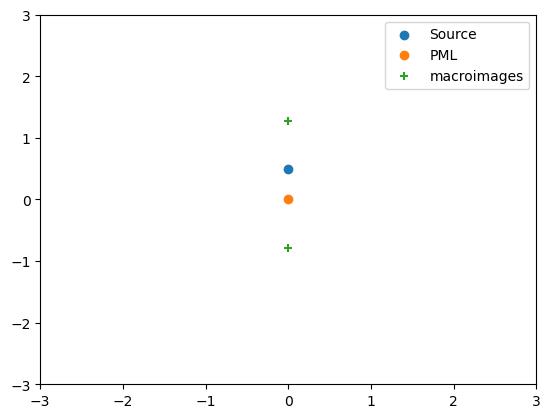

In [9]:
# Sky Plot

plt.scatter(y0, y1, label='Source')
plt.scatter(0,0, label='PML')

plt.scatter(MacroImg_ra/thetaE_PML, MacroImg_dec/thetaE_PML, marker='+', label='macroimages')

plt.xlim([-3,3])
plt.ylim([-3,3])

plt.legend()

In [10]:
# This script illustrates how to use lensingGW's unlensed waveform routines

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
config_file = '/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the unlensed waveform polarizations, strains in the requested detectors and their frequencies
freqs, hp_tilde, hc_tilde, strain_dict = waveform_model.unlensed_gw()

# and their signal-to-noise-ratios
SNR_dict = waveform_model.unlensed_snr()

# access an unlensed strain
sH1 = strain_dict['H1']


---- Will simulate a signal with the following parameters ----

m1          --> 45
m2          --> 36
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.0
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.0
distance    --> 15521.788104196934
ra          --> 0
dec         --> 4.904407255147181e-09
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Unlensed SNR in H1 = 1.80
Network SNR of the unlensed simulation 1.804045



In [11]:
# Lensed Gravitational waves by PML on the Positive Parity Side of the SIE

# This script illustrates how to use lensingGW's lensed waveform routines
import numpy as np

######################
# lens configuration #
######################

# source position, in radians
beta0, beta1 = y0*thetaE_PML, y1*thetaE_PML

# redshifts
zL, zS = 0.5, 2.0

# binary point mass lens model
lens_model_list     = ['POINT_MASS']
kwargs_PML          = {"center_x":0.0, 'center_y':0.0, 'theta_E':thetaE_PML}
kwargs_lens_list    = [kwargs_PML]

# binary point mass images, in radians
ra  = MacroImg_ra
dec = MacroImg_dec

####################
# lensed waveforms #
####################

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
config_file = '/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the lensed waveform polarizations, strains in the requested detectors and their frequencies
freqs_lensed, hp_tilde_lensed, hc_tilde_lensed, lensed_strain_dict = waveform_model.lensed_gw(ra,dec,
                                                                                              beta0,beta1,
                                                                                              zL, zS,
                                                                                              lens_model_list,
                                                                                              kwargs_lens_list)

# and their signal-to-noise-ratios
lensed_SNR_dict = waveform_model.lensed_snr(ra,dec,
                                            beta0,beta1,
                                            zL, zS,
                                            lens_model_list,
                                            kwargs_lens_list)

# access a lensed strain
lensed_sH1 = lensed_strain_dict['H1']


---- Will simulate a signal with the following parameters ----

m1          --> 45
m2          --> 36
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.0
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.0
distance    --> 15521.788104196934
ra          --> 0
dec         --> 4.904407255147181e-09
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Lensed SNR in H1 = 2.63
Network SNR of the lensed simulation 2.627411



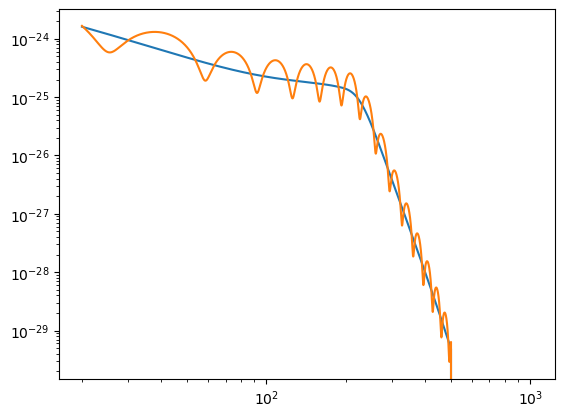

In [12]:
plt.plot(freqs, np.abs(sH1))
plt.plot(freqs_lensed, np.abs(lensed_sH1))

plt.xscale('log')
plt.yscale('log')

1.8138777691599985


/var/folders/z7/s5rym2f96s37ltj5j14bx20w0000gn/T/ipykernel_2148/2462244277.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = lensed_sH1/sH1


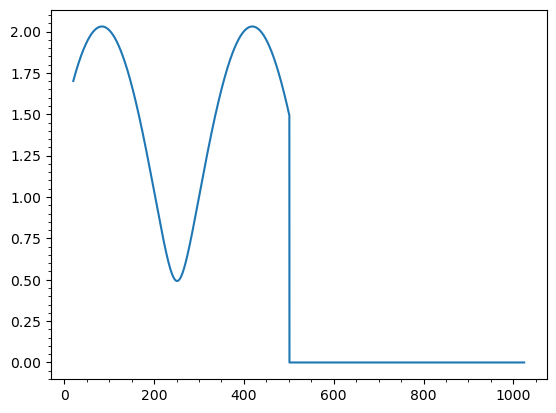

In [106]:
ratio = lensed_sH1/sH1
F_f = np.abs(np.nan_to_num(ratio))

plt.plot(freqs, F_f)
plt.minorticks_on()

print(F_f[0:100].max())